# Console Sales World Wide Dataframe

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# so this is the URL to be used for my first website scraping
url = 'https://www.vgchartz.com/charts/platform_totals/Hardware.php'

# Here we initialize the data frame 
df = pd.DataFrame()

try:
    #Get request
    response = requests.get(url)

    # Checking whether it is successful using the status code we learned in class
    if response.status_code == 200:
        
        
        # This allows me to parse through the content in the website
        soup = BeautifulSoup(response.content, 'html.parser')
        
        #the table in the url that I want has the id, 'mytable'
        table = soup.find('table', id='myTable')

        # this is to parse through the table and get the data
        df = pd.read_html(str(table), header=0)[0]

        # Assigning correct column names based on the provided screenshot information
        df.columns = [
            'Rank', 'Console', 
            'North America Sales (Millions)', 
            'Europe Sales (Millions)', 
            'Japan Sales (Millions)', 
            'Rest of World Sales (Millions)', 
            'Global Sales (Millions)'
        ]

        # This is error handing and all the N/A values are replaced with 0
        
        df.replace('N/A', pd.NA, inplace=True)
        
        df.fillna(0, inplace=True)

        # These are the columns indicating North America, Europe, Japan, Rest of World, and total sales
        
        
        sales_columns = [
            'North America Sales (Millions)', 
            'Europe Sales (Millions)', 
            'Japan Sales (Millions)', 
            'Rest of World Sales (Millions)', 
            'Global Sales (Millions)'
        ]

        for col in sales_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

except Exception as e:
    df = pd.DataFrame({'Error': [str(e)]})

df.head(84)






,Rank,Console,North America Sales (Millions),Europe Sales (Millions),Japan Sales (Millions),Rest of World Sales (Millions),Global Sales (Millions)
0,1,PlayStation 2 (PS2),53.65,55.28,23.18,26.59,158.70
1,2,Nintendo DS (DS),57.92,51.84,32.99,11.28,154.02
2,3,Nintendo Switch (NS),46.60,33.56,31.40,19.98,131.54
3,4,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
4,5,PlayStation 4 (PS4),38.10,45.87,9.66,23.53,117.16
...,...,...,...,...,...,...,...
78,79,Tandy Video Information System (VIS),0.01,0.00,0.00,0.00,0.01
79,80,HyperScan (HS),0.00,0.00,0.00,0.00,0.01
80,81,Adventure Vision (AV),0.01,0.00,0.00,0.00,0.01
81,82,Palmtex Portable Videogame System (PVS),0.01,0.00,0.00,0.00,0.01


# Console Sales Graph


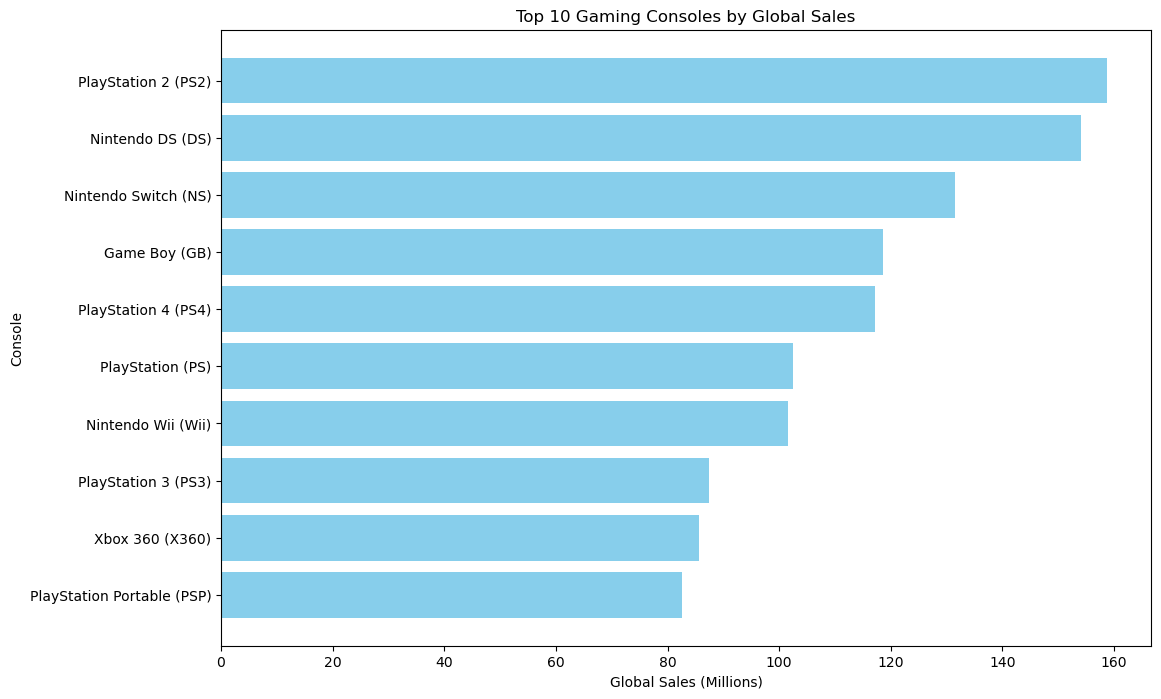

In [19]:
import matplotlib.pyplot as plt

# This will sort the DataFrame by 'Global Sales (Millions)' in descending order for better visualization

df_sorted = df.sort_values('Global Sales (Millions)', ascending=False)

# Here are the top 10 consolves
top_consoles = df_sorted.head(10)

# using a bar graph

plt.figure(figsize=(12, 8))
plt.barh(top_consoles['Console'], top_consoles['Global Sales (Millions)'], color='skyblue')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Console')
plt.title('Top 10 Gaming Consoles by Global Sales')
plt.gca().invert_yaxis()  
plt.show()


# Console Prices World Wide Dataframe

In [20]:
import requests
from bs4 import BeautifulSoup

def scrape_website(url):
    # Get Request to the url
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve the webpage: {response.status_code}")
        return []

    # This will parse the content of the request with BeautifulSoup
    
    soup = BeautifulSoup(response.content, 'html.parser')

    #Finding all the info from the website and the info I need
    console_cards = soup.find_all(class_='ConsoleCard_paper__kARmS')

    # Initializing an empty list for the console data
    console_data = []

    for card in console_cards:
        
        h2_tags = card.find_all('h2')
        
        if len(h2_tags) >= 2:
            
            # Extracting the console name and price
            name = h2_tags[0].text.strip()
            price = h2_tags[1].text.strip()
        else:
            # This is for error handling if required
            name = 'N/A'
            price = 'N/A'

        # Creates dictionary for future use
        console_info = {
            'name': name,
            'price': price
        }

        # Added to the list which is console data
        
        console_data.append(console_info)

    # Returns the info needed
    return console_data

url = "https://www.inflationstation.net/"
data = scrape_website(url)

for console in data:
    print(console)



{'name': 'Nintendo Switch (OLED)', 'price': '$386'}
{'name': 'Steam Deck', 'price': '$464/$615/$754'}
{'name': 'PlayStation 5', 'price': '$586'}
{'name': 'PlayStation 5 Digital Edition', 'price': '$469'}
{'name': 'Xbox Series S', 'price': '$351'}
{'name': 'Xbox Series X', 'price': '$586'}
{'name': 'Nintendo Switch Lite', 'price': '$237'}
{'name': 'Nintendo Switch', 'price': '$375'}
{'name': 'PlayStation 4', 'price': '$523'}
{'name': 'Xbox One', 'price': '$654'}
{'name': 'Wii U', 'price': '$463'}
{'name': 'PlayStation Vita', 'price': '$334'}
{'name': 'Nintendo 3DS', 'price': '$341'}
{'name': 'PlayStation 3', 'price': '$757'}
{'name': 'Wii', 'price': '$378'}
{'name': 'Xbox 360', 'price': '$463'}
{'name': 'PlayStation Portable', 'price': '$394'}
{'name': 'Nintendo DS', 'price': '$238'}
{'name': 'N-Gage', 'price': '$494'}
{'name': 'GameCube', 'price': '$343'}
{'name': 'Xbox', 'price': '$515'}
{'name': 'Game Boy Advance', 'price': '$170'}
{'name': 'PlayStation 2', 'price': '$525'}
{'name': 

# Console Prices Graph

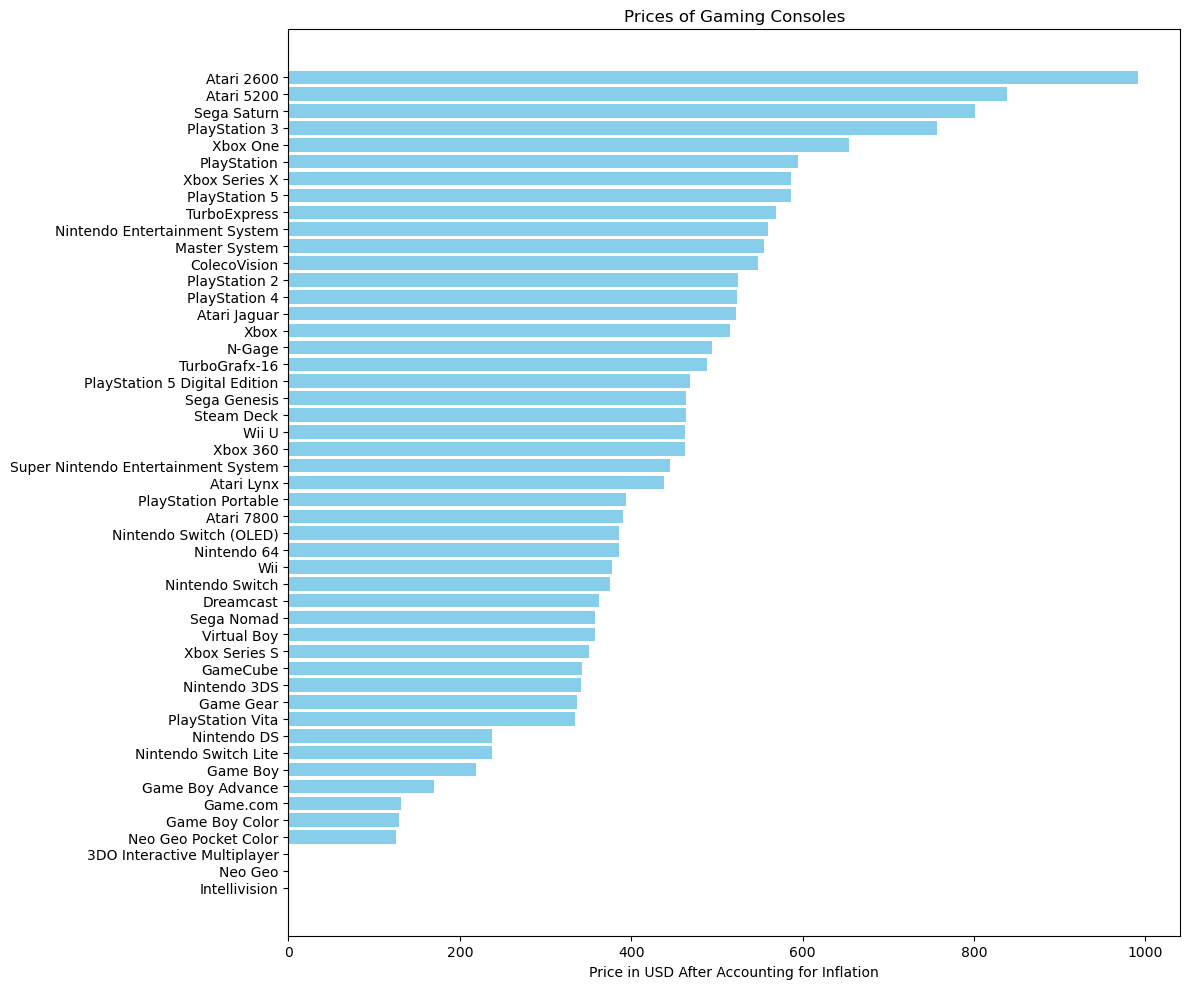

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_price = pd.DataFrame(data)

# This will extract the first numeric value from the 'price' string and convert it to an integer
df_price['price'] = df_price['price'].str.extract(r'(\d+)').astype(float)

# This will sort the dataframe by price
df_sorted = df_price.sort_values(by='price', ascending=True)

# Another Bar Graph
plt.figure(figsize=(12, 10))
plt.barh(df_sorted['name'], df_sorted['price'], color='skyblue')
plt.xlabel('Price in USD After Accounting for Inflation')
plt.title('Prices of Gaming Consoles')
plt.tight_layout()

plt.show()


# Data Statistics for Better Understanding

In [ ]:
# This is to show all the data and what it looks like
print(df.head())  
print(df_price.head())  

print(df['Console'].unique()) 
print(df_price['name'].unique()) 


   Rank               Console  North America Sales (Millions)  \
0     1   PlayStation 2 (PS2)                           53.65   
1     2      Nintendo DS (DS)                           57.92   
2     3  Nintendo Switch (NS)                           46.60   
3     4         Game Boy (GB)                           43.18   
4     5   PlayStation 4 (PS4)                           38.10   

   Europe Sales (Millions)  Japan Sales (Millions)  \
0                    55.28                   23.18   
1                    51.84                   32.99   
2                    33.56                   31.40   
3                    40.05                   32.47   
4                    45.87                    9.66   

   Rest of World Sales (Millions)  Global Sales (Millions)  
0                           26.59                   158.70  
1                           11.28                   154.02  
2                           19.98                   131.54  
3                            2.99       

# Merged Console Sales and Prices Analysis with Scatter Graph

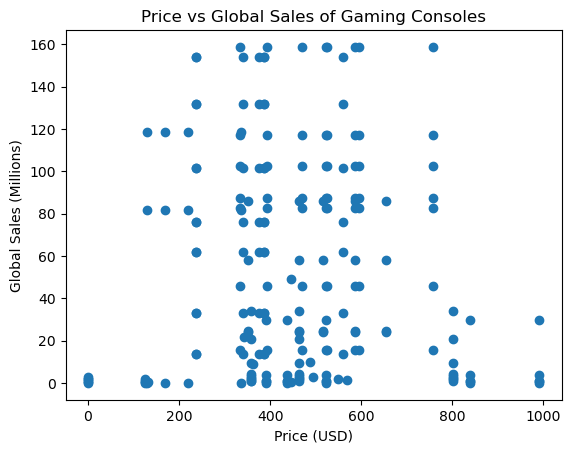

Correlation between price and global sales: -0.05838645364258636
   Rank              Console  North America Sales (Millions)  \
0     1  PlayStation 2 (PS2)                           53.65   
1     1  PlayStation 2 (PS2)                           53.65   
2     1  PlayStation 2 (PS2)                           53.65   
3     1  PlayStation 2 (PS2)                           53.65   
4     1  PlayStation 2 (PS2)                           53.65   

   Europe Sales (Millions)  Japan Sales (Millions)  \
0                    55.28                   23.18   
1                    55.28                   23.18   
2                    55.28                   23.18   
3                    55.28                   23.18   
4                    55.28                   23.18   

   Rest of World Sales (Millions)  Global Sales (Millions)          key  \
0                           26.59                    158.7  PlayStation   
1                           26.59                    158.7  PlayStation   


In [23]:
import matplotlib.pyplot as plt

def extract_key(name):
    return name.split()[0]  

df_price['key'] = df_price['name'].apply(extract_key)
df['key'] = df['Console'].apply(extract_key)


#Merging both to create a new dataframe for analysis purpose

df_merged = pd.merge(df, df_price, on='key', how='inner')



# This time a scatter plot for better visualization
plt.scatter(df_merged['price'], df_merged['Global Sales (Millions)'])
plt.xlabel('Price (USD)')
plt.ylabel('Global Sales (Millions)')
plt.title('Price vs Global Sales of Gaming Consoles')
plt.show()


correlation = df_merged['price'].corr(df_merged['Global Sales (Millions)'])
print("Correlation between price and global sales:", correlation)

print(df_merged.head())  

# Training Data and Linear Regression Model

Mean Squared Error: 2553.7658922199344
Coefficient of Determination (R^2): -0.02074607058793032


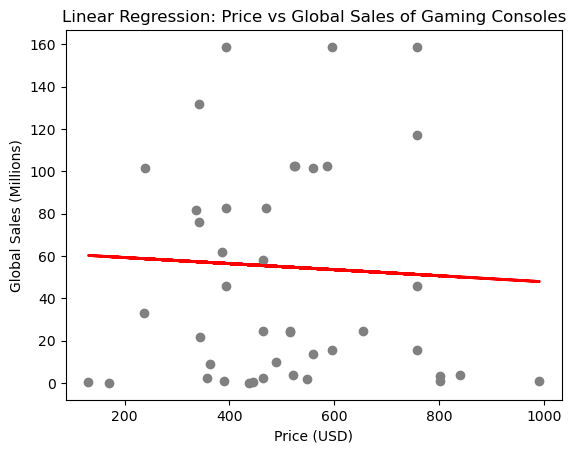

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


X = df_merged[['price']]  
y = df_merged['Global Sales (Millions)'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression model
model = LinearRegression()

# Training the model for purposes of this project
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation

from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Price (USD)')
plt.ylabel('Global Sales (Millions)')
plt.title('Linear Regression: Price vs Global Sales of Gaming Consoles')
plt.show()


# Uses One-Hot, Label, and target encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Console_Label'] = label_encoder.fit_transform(df['Console'])


In [26]:
df_one_hot = pd.get_dummies(df, columns=['Console'])


In [27]:
from sklearn.model_selection import train_test_split
import category_encoders as ce

# split data with new info
X_train, X_test, y_train, y_test = train_test_split(df[['Console']], df['Global Sales (Millions)'], test_size=0.2, random_state=42)

# Using target encoding for modeling
target_encoder = ce.TargetEncoder()
X_train['Console_Target'] = target_encoder.fit_transform(X_train['Console'], y_train)

X_test['Console_Target'] = target_encoder.transform(X_test['Console'])


In [28]:
# label encoding
df = df.merge(df['Console_Label'], left_index=True, right_index=True)

# One-hot encoding
df = df.merge(df_one_hot, left_index=True, right_index=True)

df_train = X_train.merge(y_train, left_index=True, right_index=True)
df_test = X_test.merge(y_test, left_index=True, right_index=True)


# Splits Training Data

In [29]:
from sklearn.model_selection import train_test_split


X = df_merged[['price']]  
y = df_merged['Global Sales (Millions)']  

# Making sure to split the dataset into training (80%) and testing (20%) sets (I use it since its more common)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


num_samples_train = len(X_train)
num_samples_test = len(X_test)
num_samples_total = len(X)


training_ratio = num_samples_train / num_samples_total
testing_ratio = num_samples_test / num_samples_total

# Testing whether the ratio is actually the one I desired
print(f"Training ratio: {training_ratio:.2f} (Expected: 0.80)")
print(f"Testing ratio: {testing_ratio:.2f} (Expected: 0.20)")


Training set size: 164
Testing set size: 42
Training ratio: 0.80 (Expected: 0.80)
Testing ratio: 0.20 (Expected: 0.20)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Descision Tree to find Mean Squared Error and R^2

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
# Training
decision_tree_model.fit(X_train, y_train)
# More predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#I still don't know why R^2 is still not that close to 1

Mean Squared Error: 1691.6991635766053
R-squared: 0.33534983015621556


# GridSearchCV and RandomizedSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Grid Search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Randomized Search

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


grid_search.fit(X_train, y_train)

random_search.fit(X_train, y_train)

print("Best parameters (Grid Search):", grid_search.best_params_)

print("Best parameters (Randomized Search):", random_search.best_params_)


best_grid_model = grid_search.best_estimator_
grid_pred = best_grid_model.predict(X_test)
print("Grid Search Best Model's R^2:", r2_score(y_test, grid_pred))

best_random_model = random_search.best_estimator_
random_pred = best_random_model.predict(X_test)
print("Randomized Search Best Model's R^2:", r2_score(y_test, random_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[C

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5; total time=   0.0

/Users/johanchittissery/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
